In [91]:
import requests
import json
from IPython.display import display, Image

In [3]:
WMS_BASE_URL = "http://geoportal.jatengprov.go.id/geoserver/wms"

### GetCapabilities

In [88]:
params = {
  "service": "wms",
  "version": "1.3.0",
  "request": "GetCapabilities",
}

response = requests.get(WMS_BASE_URL, params=params)

response

<Response [200]>

In [89]:
response.text

'<?xml version="1.0" encoding="UTF-8"?><WMS_Capabilities version="1.3.0" updateSequence="7956" xmlns="http://www.opengis.net/wms" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.opengis.net/wms http://geoportal.jatengprov.go.id/geoserver/schemas/wms/1.3.0/capabilities_1_3_0.xsd">\n  <Service>\n    <Name>WMS</Name>\n    <Title>GeoServer Web Map Service</Title>\n    <Abstract>A compliant implementation of WMS plus most of the SLD extension (dynamic styling). Can also generate PDF, SVG, KML, GeoRSS</Abstract>\n    <KeywordList>\n      <Keyword>WFS</Keyword>\n      <Keyword>WMS</Keyword>\n      <Keyword>GEOSERVER</Keyword>\n    </KeywordList>\n    <OnlineResource xlink:type="simple" xlink:href="http://geoserver.org"/>\n    <ContactInformation>\n      <ContactPersonPrimary>\n        <ContactPerson>(024) 8319140</ContactPerson>\n        <ContactOrganization>Provinsi Jawa Tengah</ContactOrganization>\n      </Cont

In [90]:
with open("../output/wms_get_capabilities.xml", "w") as f:
  f.write(response.text)

## GetMap

In [41]:
params = {
  "service": "wms",
  "version": "1.1.0",
  "request": "GetMap",
  "layers": "ADMIN:adm_jateng_bts_kabupaten_kota_250k_330020190617103125",
  "styles": "",
  "srs": "EPSG:4326",
  "bbox": "110,-8,111,-6",
  "width": 500,
  "height": 800,
  "format": "image/png"
}

response = requests.get(WMS_BASE_URL, params=params)

response

<Response [200]>

In [50]:
response.content

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xf4\x00\x00\x03 \x08\x02\x00\x00\x00Z\x84\x07\xcd\x00\x01\x00\x14IDATx^\xec\x9d\tx\x14\xc5\xf6\xf6%\td%$\x90@\x80@\x02\t\xfb\x0e\t$\x84%\x84\x10\xf6}\xdf\xf7M\x01\xd9\x17\x01A\x04A6\x01\x11\x11DQ\x11\x14\x91\x0b\nW\xd4(x\xb9\x82\x1b\xa0"\x82\x02\xb2\x04EE/\x7f\xf5*WQ\xbf\xef\x1dk\xact\xbag&=\x93Y{^\x9e~x&5\xd5\xd5Uow\xfd\xba\xe6\xd4\xa9Sw\xfc?\xfe\xa3\x02T\x80\nP\x01\xc3)p\x87\xe1Z\xc4\x06Q\x01*@\x05\xa8\xc0\xff#\xdc\xf9\x10P\x01*@\x05\x0c\xa8\x00\xe1n\xc0\x9b\xca&Q\x01*@\x05\x08w>\x03T\x80\nP\x01\x03*@\xb8\x1b\xf0\xa6\xb2IT\x80\nP\x01\xc2\x9d\xcf\x00\x15\xa0\x02T\xc0\x80\n\x10\xee\x06\xbc\xa9l\x12\x15\xa0\x02T\x80p\xe73@\x05\xa8\x00\x150\xa0\x02\x84\xbb\x01o*\x9bD\x05\xa8\x00\x15 \xdc\xf9\x0cP\x01*@\x05\x0c\xa8\x00\xe1n\xc0\x9b\xca&Q\x01*@\x05\x08w>\x03T\x80\nP\x01\x03*@\xb8\x1b\xf0\xa6\xb2IT\x80\nP\x01\xc2\x9d\xcf\x00\x15\xa0\x02T\xc0\x80\n\x10\xee\x06\xbc\xa9l\x12\x15\xa0\x02T\x80p\xe73@\x05\xa8\x00\x150\xa0\x02\x84\xbb\x01o*\x9bD\x0

In [43]:
response.url

'http://geoportal.jatengprov.go.id/geoserver/wms?service=wms&version=1.1.0&request=GetMap&layers=ADMIN%3Aadm_jateng_bts_kabupaten_kota_250k_330020190617103125&styles=&srs=EPSG%3A4326&bbox=110%2C-8%2C111%2C-6&width=500&height=800&format=image%2Fpng'

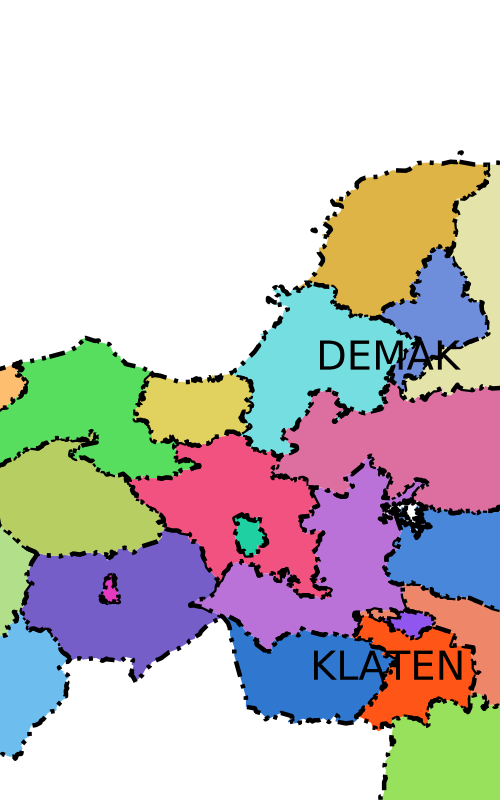

In [56]:
display(Image(data=response.content))

In [47]:
with open("../output/wms_get_map.png", "wb") as file:
  for chunk in response.iter_content(chunk_size=8192):
    file.write(chunk)

### Display WMS with multiple layers

In [57]:
params = {
  "service": "wms",
  "version": "1.1.0",
  "request": "GetMap",
  "layers": ",".join([
    "ADMIN:adm_jateng_bts_kabupaten_kota_250k_330020190617103125",
    "ADMIN:candi_di_jawa_tengah_330020220822074546"
  ]),
  "styles": "",
  "srs": "EPSG:4326",
  "bbox": "110,-8,111,-6",
  "width": 500,
  "height": 800,
  "format": "image/png"
}

response = requests.get(WMS_BASE_URL, params=params)

response

<Response [200]>

In [58]:
response.content

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xf4\x00\x00\x03 \x08\x02\x00\x00\x00Z\x84\x07\xcd\x00\x01\x00\x14IDATx^\xec\x9d\tx\x14\xc5\xf6\xf6%\td%$\x90@\x80@\x02\t\xfb\x0e\t$\x84%\x84\x10\xf6}\xdf\xf7M\x01\xd9\x17\x01A\x04A6\x01\x11\x11DQ\x11\x14\x91\x0b\nW\xd4(x\xb9\x82\x1b\xa0"\x82\x02\xb2\x04EE/\x7f\xf5*WQ\xbf\xef\x1dk\xact\xbag&=\x93Y{^\x9e~x&5\xd5\xd5Uow\xfd\xba\xe6\xd4\xa9Sw\xfc?\xfe\xa3\x02T\x80\nP\x01\xc3)p\x87\xe1Z\xc4\x06Q\x01*@\x05\xa8\xc0\xff#\xdc\xf9\x10P\x01*@\x05\x0c\xa8\x00\xe1n\xc0\x9b\xca&Q\x01*@\x05\x08w>\x03T\x80\nP\x01\x03*@\xb8\x1b\xf0\xa6\xb2IT\x80\nP\x01\xc2\x9d\xcf\x00\x15\xa0\x02T\xc0\x80\n\x10\xee\x06\xbc\xa9l\x12\x15\xa0\x02T\x80p\xe73@\x05\xa8\x00\x150\xa0\x02\x84\xbb\x01o*\x9bD\x05\xa8\x00\x15 \xdc\xf9\x0cP\x01*@\x05\x0c\xa8\x00\xe1n\xc0\x9b\xca&Q\x01*@\x05\x08w>\x03T\x80\nP\x01\x03*@\xb8\x1b\xf0\xa6\xb2IT\x80\nP\x01\xc2\x9d\xcf\x00\x15\xa0\x02T\xc0\x80\n\x10\xee\x06\xbc\xa9l\x12\x15\xa0\x02T\x80p\xe73@\x05\xa8\x00\x150\xa0\x02\x84\xbb\x01o*\x9bD\x0

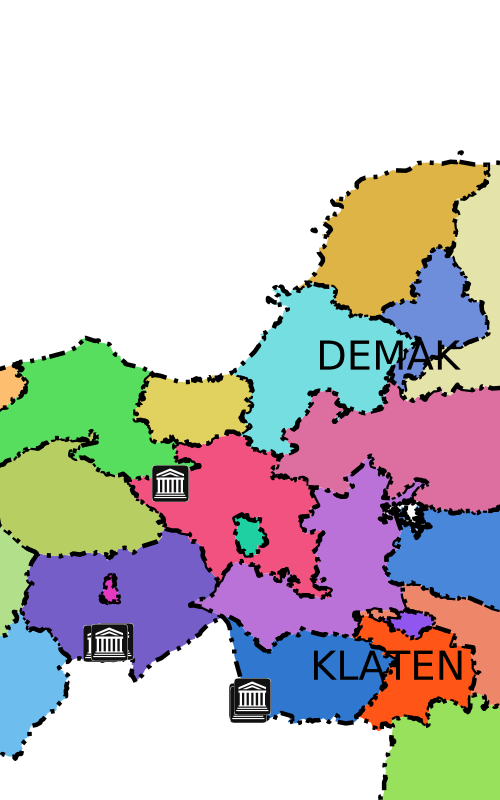

In [59]:
display(Image(data=response.content))

### Using transparent image/png

In [60]:
params = {
  "service": "wms",
  "version": "1.1.0",
  "request": "GetMap",
  "layers": ",".join([
    "ADMIN:adm_jateng_bts_kabupaten_kota_250k_330020190617103125",
    "ADMIN:candi_di_jawa_tengah_330020220822074546"
  ]),
  "styles": "",
  "srs": "EPSG:4326",
  "bbox": "110,-8,111,-6",
  "width": 500,
  "height": 800,
  "format": "image/png",
  "transparent": True
}

response = requests.get(WMS_BASE_URL, params=params)

response

<Response [200]>

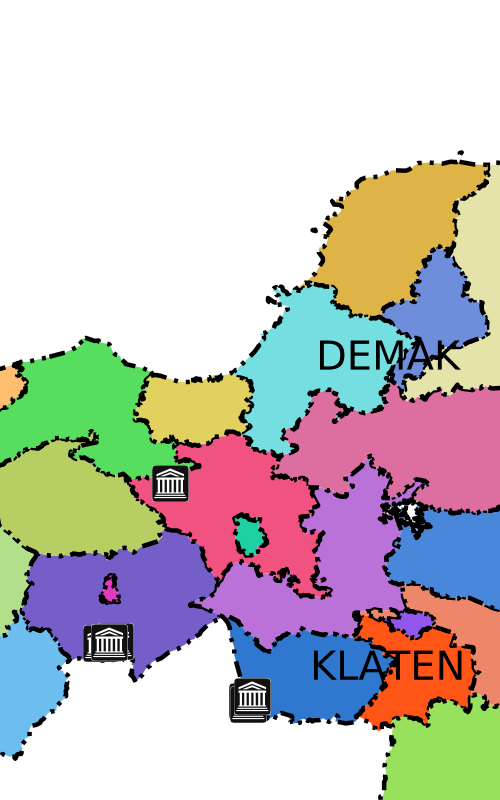

In [61]:
display(Image(data=response.content))

### With background color

In [64]:
params = {
  "service": "wms",
  "version": "1.1.0",
  "request": "GetMap",
  "layers": ",".join([
    "ADMIN:adm_jateng_bts_kabupaten_kota_250k_330020190617103125",
    "ADMIN:candi_di_jawa_tengah_330020220822074546"
  ]),
  "styles": "",
  "srs": "EPSG:4326",
  "bbox": "110,-8,111,-6",
  "width": 500,
  "height": 800,
  "format": "image/png",
  "bgcolor": "#800a0a"
}

response = requests.get(WMS_BASE_URL, params=params)

response

<Response [200]>

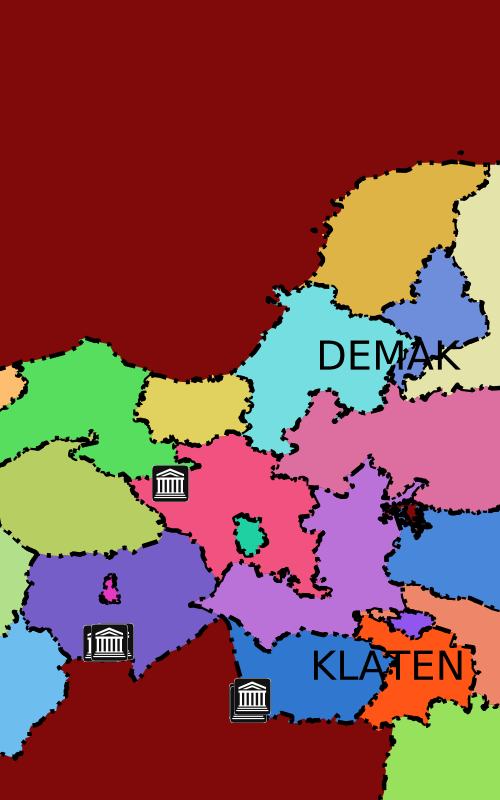

In [65]:
display(Image(data=response.content))

## GetFeatureInfo

In [66]:
layer_list = [
  "ADMIN:adm_jateng_bts_kabupaten_kota_250k_330020190617103125",
  "ADMIN:candi_di_jawa_tengah_330020220822074546"
]

params = {
  "service": "wms",
  "version": "1.1.0",
  "request": "GetFeatureInfo",
  "layers": ",".join(layer_list),
  "styles": "",
  "srs": "EPSG:4326",
  "bbox": "110,-8,111,-6",
  "width": 500,
  "height": 800,
  "format": "image/png",
  "query_layers": ",".join(layer_list),
  "x": 250,
  "y": 400
}

response = requests.get(WMS_BASE_URL, params=params)

response

<Response [200]>

In [68]:
response.text

"Results for FeatureType 'ADMIN:adm_jateng_bts_kabupaten_kota_250k_330020190617103125':\n--------------------------------------------\nwkb_geometry = [GEOMETRY (Polygon) with 278 points]\nfid_batas_ = 209\na1code = 33.00000000000\na2code = 3321.00000000000\na2name = DEMAK\na1name = JAWA TENGAH\nkode_bps = 3321\nfid_dakkab = 203\ndak_kprov = 33\ndak_nprov = JAWA TENGAH\ndak_kkab = 21\ndak_nkab = DEMAK\ndakk = 3321\nkode_dagri = 3321\ncoba = 0\nzona = 3\n--------------------------------------------\n"

In [71]:
with open("../output/wms_get_featureinfo.txt", "w") as f:
  f.write(response.text)

### Format: HTML

In [72]:
layer_list = [
  "ADMIN:adm_jateng_bts_kabupaten_kota_250k_330020190617103125",
  "ADMIN:candi_di_jawa_tengah_330020220822074546"
]

params = {
  "service": "wms",
  "version": "1.1.0",
  "request": "GetFeatureInfo",
  "layers": ",".join(layer_list),
  "styles": "",
  "srs": "EPSG:4326",
  "bbox": "110,-8,111,-6",
  "width": 500,
  "height": 800,
  "format": "image/png",
  "query_layers": ",".join(layer_list),
  "x": 250,
  "y": 400,
  "info_format": "text/html",
}

response = requests.get(WMS_BASE_URL, params=params)

response

<Response [200]>

In [73]:
response.text

'<html>\r\n  <head>\r\n    <title>Geoserver GetFeatureInfo output</title>\r\n  </head>\r\n  <style type="text/css">\r\n\ttable.featureInfo, table.featureInfo td, table.featureInfo th {\r\n\t\tborder:1px solid #ddd;\r\n\t\tborder-collapse:collapse;\r\n\t\tmargin:0;\r\n\t\tpadding:0;\r\n\t\tfont-size: 90%;\r\n\t\tpadding:.2em .1em;\r\n\t}\r\n\ttable.featureInfo th {\r\n\t    padding:.2em .2em;\r\n\t\tfont-weight:bold;\r\n\t\tbackground:#eee;\r\n\t}\r\n\ttable.featureInfo td{\r\n\t\tbackground:#fff;\r\n\t}\r\n\ttable.featureInfo tr.odd td{\r\n\t\tbackground:#eee;\r\n\t}\r\n\ttable.featureInfo caption{\r\n\t\ttext-align:left;\r\n\t\tfont-size:100%;\r\n\t\tfont-weight:bold;\r\n\t\tpadding:.2em .2em;\r\n\t}\r\n  </style>\r\n  <body>\r\n  \r\n<table class="featureInfo">\r\n  <caption class="featureInfo">adm_jateng_bts_kabupaten_kota_250k_330020190617103125</caption>\r\n  <tr>\r\n  <th>fid</th>\r\n    <th >fid_batas_</th>\r\n    <th >a1code</th>\r\n    <th >a2code</th>\r\n    <th >a2name</th>\

In [74]:
response.url

'http://geoportal.jatengprov.go.id/geoserver/wms?service=wms&version=1.1.0&request=GetFeatureInfo&layers=ADMIN%3Aadm_jateng_bts_kabupaten_kota_250k_330020190617103125%2CADMIN%3Acandi_di_jawa_tengah_330020220822074546&styles=&srs=EPSG%3A4326&bbox=110%2C-8%2C111%2C-6&width=500&height=800&format=image%2Fpng&query_layers=ADMIN%3Aadm_jateng_bts_kabupaten_kota_250k_330020190617103125%2CADMIN%3Acandi_di_jawa_tengah_330020220822074546&x=250&y=400&info_format=text%2Fhtml'

In [75]:
with open("../output/wms_get_featureinfo.html", "w") as f:
  f.write(response.text)

### Format: JSON

In [76]:
layer_list = [
  "ADMIN:adm_jateng_bts_kabupaten_kota_250k_330020190617103125",
  "ADMIN:candi_di_jawa_tengah_330020220822074546"
]

params = {
  "service": "wms",
  "version": "1.1.0",
  "request": "GetFeatureInfo",
  "layers": ",".join(layer_list),
  "styles": "",
  "srs": "EPSG:4326",
  "bbox": "110,-8,111,-6",
  "width": 500,
  "height": 800,
  "format": "image/png",
  "query_layers": ",".join(layer_list),
  "x": 250,
  "y": 400,
  "info_format": "application/json",
}

response = requests.get(WMS_BASE_URL, params=params)

response

<Response [200]>

In [77]:
response.json()

{'type': 'FeatureCollection',
 'totalFeatures': 'unknown',
 'features': [{'type': 'Feature',
   'id': 'adm_jateng_bts_kabupaten_kota_250k_330020190617103125.22',
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[110.759152, -6.79154916],
       [110.76991075, -6.80160315],
       [110.77793196, -6.80229096],
       [110.78340883, -6.80691426],
       [110.78657973, -6.81546205],
       [110.79023537, -6.81697896],
       [110.7992361, -6.8320468],
       [110.79983603, -6.83826122],
       [110.81314694, -6.83570699],
       [110.82081136, -6.84970429],
       [110.83183263, -6.84427413],
       [110.83429993, -6.84707087],
       [110.83894845, -6.84731915],
       [110.83738259, -6.85504844],
       [110.8330214, -6.85640377],
       [110.83269112, -6.85977517],
       [110.82573817, -6.86096506],
       [110.82614757, -6.86643364],
       [110.8184942, -6.87009012],
       [110.80846404, -6.88082312],
       [110.80751097, -6.89401378],
       [110.80115509, -6.89898725

In [79]:
with open("../output/wms_get_featureinfo.geojson", "w") as f:
  f.write(json.dumps(response.json(), indent=2))

#### Multiple Layers JSON

In [80]:
params = {
  "service": "wms",
  "version": "1.1.0",
  "request": "GetMap",
  "layers": ",".join([
    "ADMIN:adm_jateng_bts_kabupaten_kota_250k_330020190617103125",
    "ADMIN:candi_di_jawa_tengah_330020220822074546",
    "ADMIN:kawasan_budidaya_330020190515112635"
  ]),
  "styles": "",
  "srs": "EPSG:4326",
  "bbox": "110,-8,111,-6",
  "width": 500,
  "height": 800,
  "format": "image/png",
  "bgcolor": "#800a0a"
}

response = requests.get(WMS_BASE_URL, params=params)

response

<Response [200]>

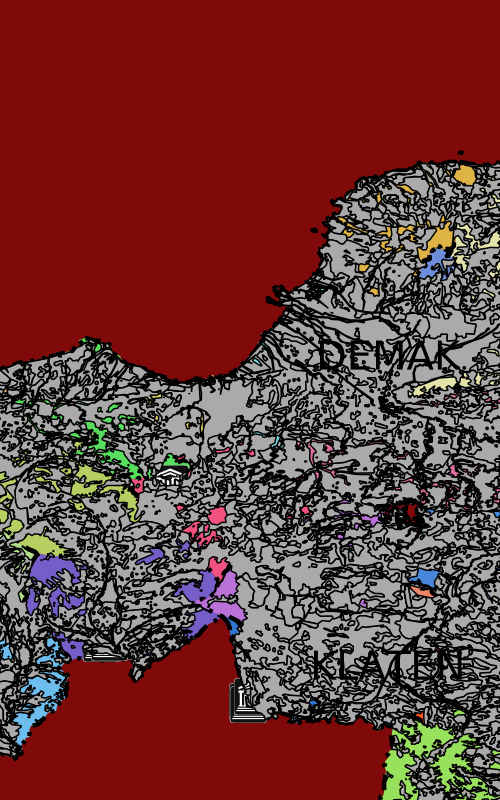

In [81]:
display(Image(data=response.content))

In [86]:
layer_list = [
  "ADMIN:adm_jateng_bts_kabupaten_kota_250k_330020190617103125",
  "ADMIN:candi_di_jawa_tengah_330020220822074546",
  "ADMIN:kawasan_budidaya_330020190515112635"
]

params = {
  "service": "wms",
  "version": "1.1.0",
  "request": "GetFeatureInfo",
  "layers": ",".join(layer_list),
  "styles": "",
  "srs": "EPSG:4326",
  "bbox": "110,-8,111,-6",
  "width": 500,
  "height": 800,
  "format": "image/png",
  "query_layers": ",".join(layer_list),
  "x": 250,
  "y": 400,
  "feature_count": 5,
  "info_format": "application/json",
}

response = requests.get(WMS_BASE_URL, params=params)

response

<Response [200]>

In [87]:
with open("../output/wms_get_featureinfo_multi.geojson", "w") as f:
  f.write(json.dumps(response.json(), indent=2))

#### Multiple Layers JSON with Buffer

In [96]:
layer_list = [
  "ADMIN:kawasan_budidaya_330020190515112635"
]

params = {
  "service": "wms",
  "version": "1.1.0",
  "request": "GetFeatureInfo",
  "layers": ",".join(layer_list),
  "styles": "",
  "srs": "EPSG:4326",
  "bbox": "110,-8,111,-6",
  "width": 500,
  "height": 800,
  "format": "image/png",
  "query_layers": ",".join(layer_list),
  "x": 250,
  "y": 400,
  "feature_count": 50,
  "buffer": 200,
  "info_format": "application/json",
}

response = requests.get(WMS_BASE_URL, params=params)

response

<Response [200]>

In [97]:
with open("../output/wms_get_featureinfo_multi_buffer.geojson", "w") as f:
  f.write(json.dumps(response.json(), indent=2))